In [7]:
from scipy.special import beta
from scipy.special import comb 
import pandas as pd

In [4]:
from scipy.special import gammaln
import numpy as np

def loglike_betabinom(params, *args):

    a, b = params[0], params[1]
    k = args[0] # the OVERALL conversions
    n = args[1] # the number of at-bats (AE)

    logpdf = gammaln(n+1) + gammaln(k+a) + gammaln(n-k+b) + gammaln(a+b) - \
     (gammaln(k+1) + gammaln(n-k+1) + gammaln(a) + gammaln(b) + gammaln(n+a+b))

    return -np.sum(logpdf) 

In [13]:
players = pd.read_csv('players.csv',index_col=0)
players.head()

,playerID,H_x,AB,Average
0,aaronha01,3771,12364,0.304998
1,aaronto01,216,944,0.228814
4,abbated01,772,3044,0.253614
5,abbotfr01,107,513,0.208577
6,abbotje01,157,596,0.263423


In [15]:
from scipy.optimize import minimize

init_params = [1, 10]
# note that I am putting 'H' in the args
res = minimize(loglike_betabinom, x0=init_params,
            args=(players['H_x'], players['AB']),
            method='L-BFGS-B', options={'disp': True, 'maxiter': 250})
print(res)

      fun: 22368.827203326884
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([0.94078191, 0.3925376 ])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 138
      nit: 21
     njev: 46
   status: 0
  success: True
        x: array([102.68002308, 291.27534215])


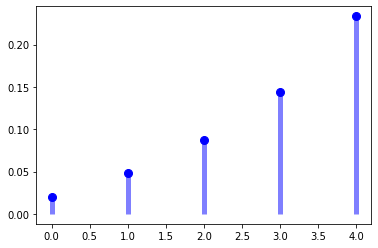

In [18]:
from scipy.stats import betabinom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, a, b = 5, 2.3, 0.63
mean, var, skew, kurt = betabinom.stats(n, a, b, moments='mvsk')
#Display the probability mass function (pmf):

x = np.arange(betabinom.ppf(0.01, n, a, b),
              betabinom.ppf(0.99, n, a, b))
ax.plot(x, betabinom.pmf(x, n, a, b), 'bo', ms=8, label='betabinom pmf')
ax.vlines(x, 0, betabinom.pmf(x, n, a, b), colors='b', lw=5, alpha=0.5)

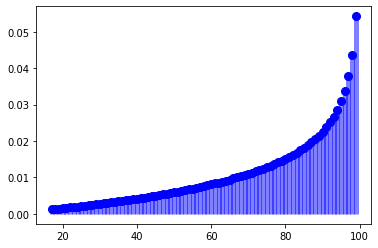

In [19]:
from scipy.stats import betabinom
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

n, a, b = 100, 2.3, 0.63
mean, var, skew, kurt = betabinom.stats(n, a, b, moments='mvsk')
#Display the probability mass function (pmf):

x = np.arange(betabinom.ppf(0.01, n, a, b),
              betabinom.ppf(0.99, n, a, b))
ax.plot(x, betabinom.pmf(x, n, a, b), 'bo', ms=8, label='betabinom pmf')
ax.vlines(x, 0, betabinom.pmf(x, n, a, b), colors='b', lw=5, alpha=0.5)

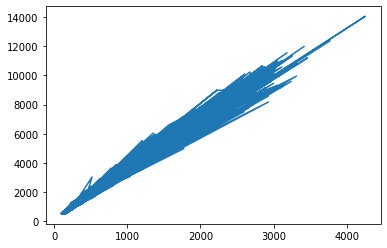

In [20]:
fig, ax = plt.subplots(1, 1)
ax.plot(players['H_x'], players['AB'])